In [1]:
%matplotlib inline
import matplotlib
#matplotlib.use("AGG")
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
from pylab import *
import numpy.ma as ma
from glob import glob
from scipy.io import netcdf
import numpy.ma as ma
import string
from scipy import stats
import matplotlib as mpl
import scipy.ndimage as ndimage
from netCDF4 import Dataset
#from Read import *
#from Plot import *

In [2]:
##############################################################################################
# Main code 
##############################################################################################

# Temporal range
x = 129
y = 104
nyears = 7

filepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/iceh.2013-12-01.nc'
#filepath = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/data/iceh.2013-12-01.nc'
#filepath2 = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/data/april_anom_cs2.nc'
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_cs2_anom_bigmask.nc'


# Read tarea, TLON and TLAT
data=Dataset(filepath,"r")
#data=netcdf.netcdf_file(filepath,'r')
TLON=data.variables['TLON'][:, :]
TLAT=data.variables['TLAT'][:, :]
tarea=data.variables['tarea'][:, :]


In [3]:
##############################################################################################
#Read timeseries
##############################################################################################

#dvidtt_nov_apr_anom.nc
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/dvidtd_daily4_masked_1990_2017.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['dvidtd_d'][:,:]
dvidtd_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
#dvidtt_daily4_masked_1990_2017
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/dvidtt_daily4_masked_1990_2017.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['dvidtt_d'][:,:]
dvidtt_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
#tair_all_daily4_masked
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/tair_all_daily4_masked.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['Tair_d'][:,:]
Tair_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
#hi_nov_1990_2016_masked
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/hi_nov_1990_2016_masked.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['hi_m'][:,:]
hi_nov_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
#ffd_sum_oct_apr
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/ffd_sum_oct_apr.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['var1'][:,:]
fdd_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)[11:38]
#dh
dvidt_masked=dvidtt_masked+dvidtd_masked
#Read average ice growth
#dvidtd
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/dvidtd_daily4_masked_1990_2017_mean.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['dvidtd_d'][:,:]
dvidtd_mean_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
#dvidtt
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/dvidtt_daily4_masked_1990_2017_mean.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['dvidtt_d'][:,:]
dvidtt_mean_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
dvidt_mean_masked=dvidtt_mean_masked+dvidtd_mean_masked

In [15]:
##############################################################################################
#Calculate detrended time series
##############################################################################################
#CSanom_masked_detrended, params = detrend_func(CSanom_masked, order=1)
dvidtd_masked_detrended, params = detrend_func(dvidtd_masked, order=1)
dvidtt_masked_detrended, params = detrend_func(dvidtt_masked, order=1)
dvidt_masked_detrended, params = detrend_func(dvidt_masked, order=1)
Tair_masked_detrended, params = detrend_func(Tair_masked, order=1)
hi_nov_masked_detrended, params = detrend_func(hi_nov_masked, order=1)
fdd_masked_detrended, params = detrend_func(fdd_masked, order=1)

In [16]:
#Map of correlation 
#dh vs hi_nov
#Corr_dh_hinov=zeros((129,104))
#del Corr_dh_hinov
Corr_dh_hinov = ma.masked_all((129,104),float)
Corr_dh_Tair = ma.masked_all((129,104),float)
Corr_dh_fdd = ma.masked_all((129,104),float)
Corr_dh_detrended_hinov = ma.masked_all((129,104),float)
Corr_dh_detrended_Tair = ma.masked_all((129,104),float)
Corr_dh_detrended_fdd = ma.masked_all((129,104),float)
for i in range(129):
    for j in range(104):
        if np.isfinite(dvidt_masked_detrended[26,i,j]):
            Corr_dh_detrended_hinov[i,j]=stats.pearsonr(dvidt_masked_detrended[:,i,j], hi_nov_masked_detrended[:,i,j])[0]
            Corr_dh_detrended_Tair[i,j]=stats.pearsonr(dvidt_masked_detrended[:,i,j], Tair_masked_detrended[:,i,j])[0]
            Corr_dh_detrended_fdd[i,j]=stats.pearsonr(dvidt_masked_detrended[:,i,j], fdd_masked_detrended[:,i,j])[0]
            Corr_dh_hinov[i,j]=stats.pearsonr(dvidt_masked[:,i,j], hi_nov_masked[:,i,j])[0]
            Corr_dh_Tair[i,j]=stats.pearsonr(dvidt_masked[:,i,j], Tair_masked[:,i,j])[0]
            Corr_dh_fdd[i,j]=stats.pearsonr(dvidt_masked[:,i,j], fdd_masked[:,i,j])[0]

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


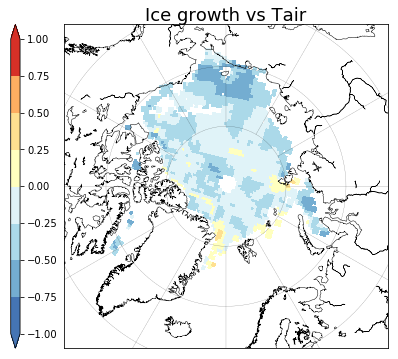

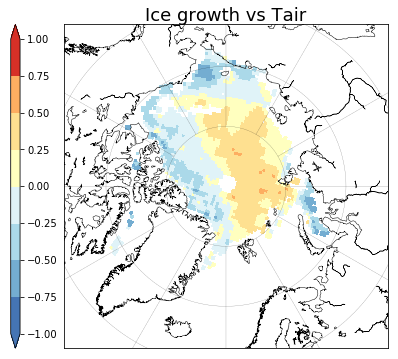

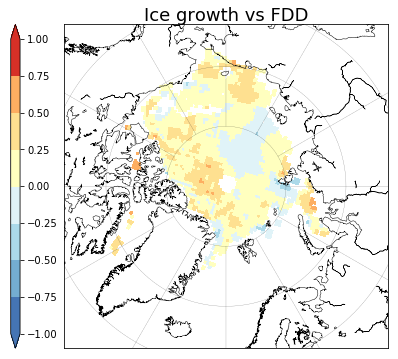

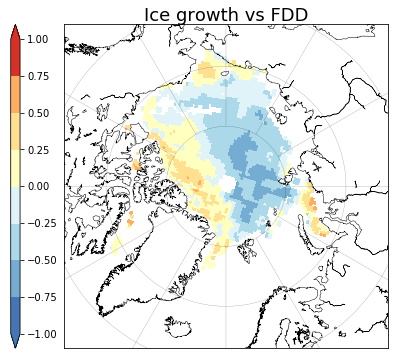

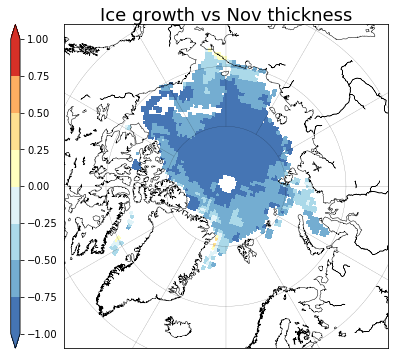

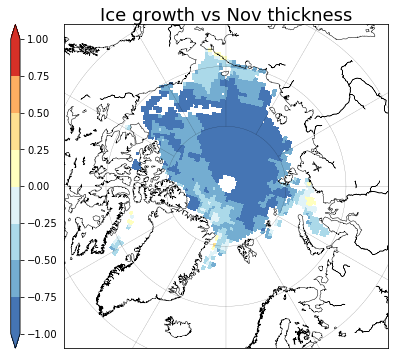

In [19]:
#clevs = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.2,0]
clevs = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
#plot_12months_clim_color_contour(TLON, TLAT, Corr_dh_hinov, clevs, 'Corr', y, ['Ice growth vs Nov thickness'])
#plot_12months_clim_color_contour(TLON, TLAT, Corr_dh_Tair, clevs, 'Corr', y, ['Ice growth vs Tair'])
#plot_12months_clim_color_contour(TLON, TLAT, Corr_dh_fdd, clevs, 'Corr', y, ['Ice growth vs FDD'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_detrended_Tair, clevs, 'Corr', y, ['Ice growth vs Tair'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_Tair, clevs, 'Corr', y, ['Ice growth vs Tair'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_detrended_fdd, clevs, 'Corr', y, ['Ice growth vs FDD'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_fdd, clevs, 'Corr', y, ['Ice growth vs FDD'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_detrended_hinov, clevs, 'Corr', y, ['Ice growth vs Nov thickness'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_hinov, clevs, 'Corr', y, ['Ice growth vs Nov thickness'])
#clevs = [0,0.25,.5,0.75,1.0,1.25,1.5,1.75,2]
#plot_12months_clim_color(TLON, TLAT, dvidt_mean_masked[0]/100., clevs, 'Corr', y, ['Ice growth'])

In [20]:
#Map of correlation 
#dh vs hi_nov
#Corr_dh_hinov=zeros((129,104))
del Corr_dh_hinov
Corr_dh_hinov = ma.masked_all((129,104),float)
Corr_dh_Tair = ma.masked_all((129,104),float)
Corr_dh_fdd = ma.masked_all((129,104),float)
Corr_dh_detrended_hinov = ma.masked_all((129,104),float)
Corr_dh_detrended_Tair = ma.masked_all((129,104),float)
Corr_dh_detrended_fdd = ma.masked_all((129,104),float)
for i in range(129):
    for j in range(104):
        if np.isfinite(dvidt_masked_detrended[26,i,j]):
            Corr_dh_detrended_hinov[i,j]=stats.pearsonr(dvidtt_masked_detrended[:,i,j], hi_nov_masked_detrended[:,i,j])[0]
            Corr_dh_detrended_Tair[i,j]=stats.pearsonr(dvidtt_masked_detrended[:,i,j], Tair_masked_detrended[:,i,j])[0]
            Corr_dh_detrended_fdd[i,j]=stats.pearsonr(dvidtt_masked_detrended[:,i,j], fdd_masked_detrended[:,i,j])[0]
            Corr_dh_hinov[i,j]=stats.pearsonr(dvidtt_masked[:,i,j], hi_nov_masked[:,i,j])[0]
            Corr_dh_Tair[i,j]=stats.pearsonr(dvidtt_masked[:,i,j], Tair_masked[:,i,j])[0]
            Corr_dh_fdd[i,j]=stats.pearsonr(dvidtt_masked[:,i,j], fdd_masked[:,i,j])[0]

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


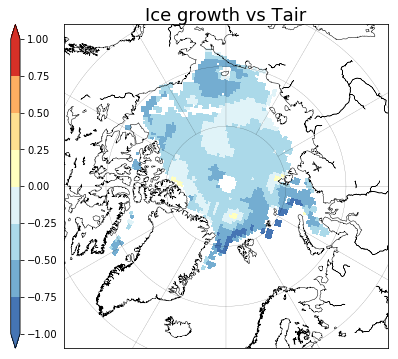

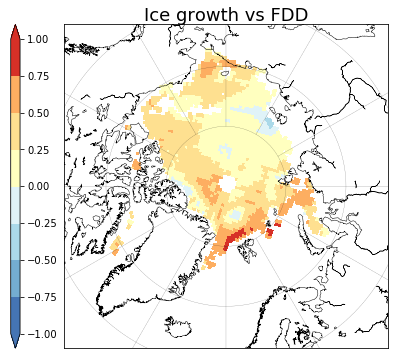

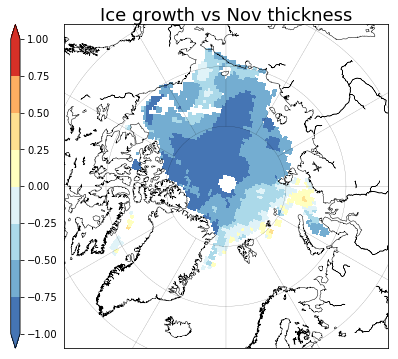

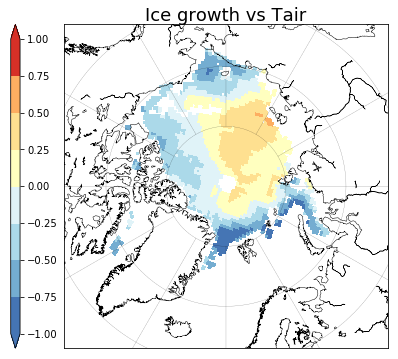

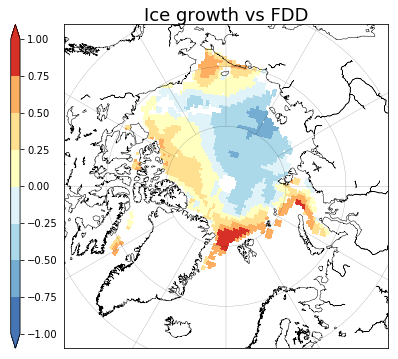

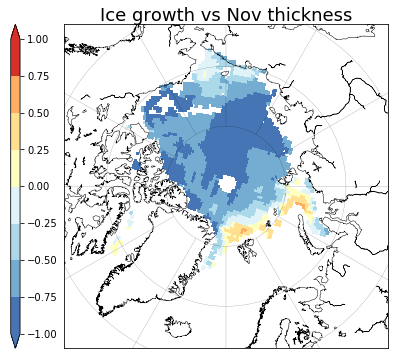

In [21]:
#clevs = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.2,0]
clevs = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
#plot_12months_clim_color_contour(TLON, TLAT, Corr_dh_hinov, clevs, 'Corr', y, ['Ice growth vs Nov thickness'])
#plot_12months_clim_color_contour(TLON, TLAT, Corr_dh_Tair, clevs, 'Corr', y, ['Ice growth vs Tair'])
#plot_12months_clim_color_contour(TLON, TLAT, Corr_dh_fdd, clevs, 'Corr', y, ['Ice growth vs FDD'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_detrended_Tair, clevs, 'Corr_detrended_dvidtt_tair', y, ['Ice growth vs Tair'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_detrended_fdd, clevs, 'Corr_detrended_dvidtt_FDD', y, ['Ice growth vs FDD'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_detrended_hinov, clevs, 'Corr_detrended_dvidtt_hinov', y, ['Ice growth vs Nov thickness'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_Tair, clevs, 'Corr_dvidtt_tair', y, ['Ice growth vs Tair'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_fdd, clevs, 'Corr_dvidtt_FDD', y, ['Ice growth vs FDD'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_hinov, clevs, 'Corr_dvidtt_hinov', y, ['Ice growth vs Nov thickness'])

In [28]:
#Map of p values 
#dh vs hi_nov
#Corr_dh_hinov=zeros((129,104))
#del Corr_dh_hinov
Corr_dh_hinov = ma.masked_all((129,104),float)
Corr_dh_Tair = ma.masked_all((129,104),float)
Corr_dh_fdd = ma.masked_all((129,104),float)
Corr_dh_detrended_hinov = ma.masked_all((129,104),float)
Corr_dh_detrended_Tair = ma.masked_all((129,104),float)
Corr_dh_detrended_fdd = ma.masked_all((129,104),float)
for i in range(129):
    for j in range(104):
        if np.isfinite(dvidt_masked_detrended[26,i,j]):
            Corr_dh_detrended_hinov[i,j]=stats.pearsonr(dvidt_masked_detrended[:,i,j], hi_nov_masked_detrended[:,i,j])[1]
            Corr_dh_detrended_Tair[i,j]=stats.pearsonr(dvidt_masked_detrended[:,i,j], Tair_masked_detrended[:,i,j])[1]
            Corr_dh_detrended_fdd[i,j]=stats.pearsonr(dvidt_masked_detrended[:,i,j], fdd_masked_detrended[:,i,j])[1]
            Corr_dh_hinov[i,j]=stats.pearsonr(dvidt_masked[:,i,j], hi_nov_masked[:,i,j])[1]
            Corr_dh_Tair[i,j]=stats.pearsonr(dvidt_masked[:,i,j], Tair_masked[:,i,j])[1]
            Corr_dh_fdd[i,j]=stats.pearsonr(dvidt_masked[:,i,j], fdd_masked[:,i,j])[1]

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


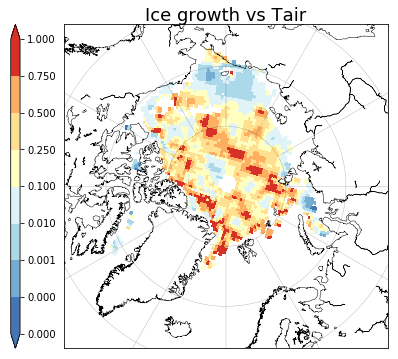

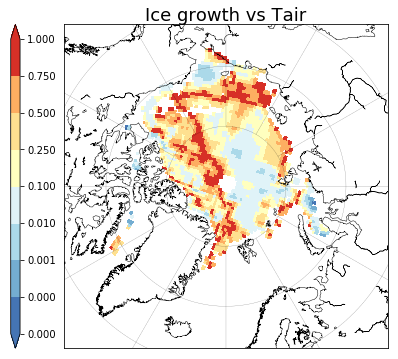

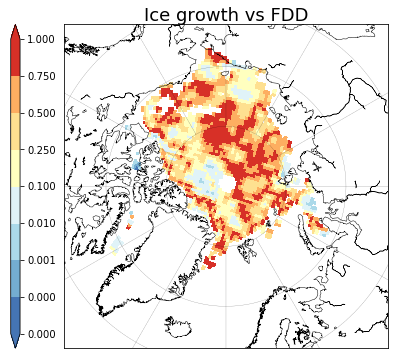

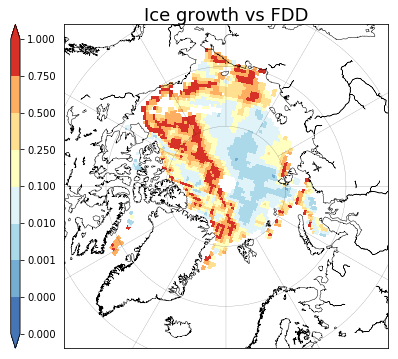

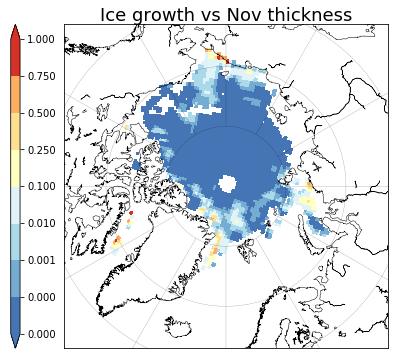

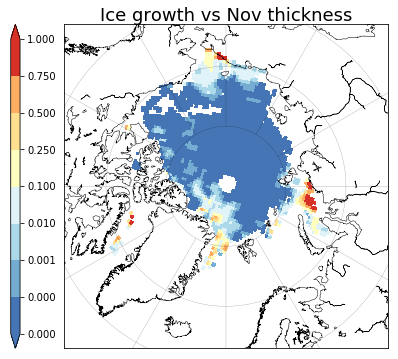

In [31]:
#clevs = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.2,0]
clevs = [0,0.0001,0.001,0.01,0.1,0.25,0.5,0.75,1]
#plot_12months_clim_color_contour(TLON, TLAT, Corr_dh_hinov, clevs, 'Corr', y, ['Ice growth vs Nov thickness'])
#plot_12months_clim_color_contour(TLON, TLAT, Corr_dh_Tair, clevs, 'Corr', y, ['Ice growth vs Tair'])
#plot_12months_clim_color_contour(TLON, TLAT, Corr_dh_fdd, clevs, 'Corr', y, ['Ice growth vs FDD'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_detrended_Tair, clevs, 'p_value', y, ['Ice growth vs Tair'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_Tair, clevs, 'p_value', y, ['Ice growth vs Tair'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_detrended_fdd, clevs, 'p_value', y, ['Ice growth vs FDD'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_fdd, clevs, 'p_value', y, ['Ice growth vs FDD'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_detrended_hinov, clevs, 'p_value', y, ['Ice growth vs Nov thickness'])
plot_12months_clim_color(TLON, TLAT, Corr_dh_hinov, clevs, 'p_value', y, ['Ice growth vs Nov thickness'])
#clevs = [0,0.25,.5,0.75,1.0,1.25,1.5,1.75,2]
#plot_12months_clim_color(TLON, TLAT, dvidt_mean_masked[0]/100., clevs, 'Corr', y, ['Ice growth'])

In [18]:
##############################################################################################
# Function to print pdf clim
##############################################################################################

def plot_12months_clim_color(TLON, TLAT, var3D, clevs, variable_in, y, title):

        #CHOOSE MAP PROJECTION
        m = Basemap(projection='npaeqd',boundinglat=63,lon_0=360,resolution='l')
        y1 ='%02d' %(2011+y)
#        y1 ='%02d' %(1990+y)

#READ IN LON/LAT AND THEN FIND THE XY COORDINATES IN THE GIVEN BASEMAP PROJECTION ABOVE.
        lons = TLON # var2D[1]
        lats = TLAT # var2D[2]
        xpts,ypts = m(lons,lats)

        fig = figure(figsize=(6.5,5))
        clf()
#        title=['CICE anomaly April '+y1]
#        title=['free CICE anomaly April '+y1]
#        title=['CS anomaly April '+y1]
#        title=['dh AWI - CPOM '+y1]
#        title=['CICE anomaly dh dyn '+y1]
#        title=['CICE anomaly dh therm '+y1]    
#        title=['Anom FDD 1 Oct -> 15 Apr '+y1]
        subplots_adjust(left=0.05, right=0.95, wspace=0.03, hspace=0.08, bottom=0.05, top=0.95)

        ax1 = subplot(1,1,1)
        text(0.5, 1.01, '%s' %title[0],
        horizontalalignment='center',
        fontsize=18,
        transform = ax1.transAxes)

#        cmap = mpl.colors.ListedColormap(['#4575b4','#74add1','#abd9e9','#f8f8ff','#f8f8ff','#fee090','#fdae61','#f46d43','#d73027'])
        cmap = mpl.colors.ListedColormap(['#4575b4','#74add1','#abd9e9','#e0f3f8','#ffffbf','#fee090','#fdae61','#f46d43','#d73027'])
        #cmap = mpl.colors.ListedColormap(['#081D58','#253494','#225EA8','#1D91C0','#41B6C4','#7FCDBB','#C7E9B4','#EDF8B1','#FFFFD9'])
        bounds = clevs
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        im1 = m.pcolormesh(xpts, ypts, var3D, cmap=cmap, norm = norm)#, origin='lower')

#        clevs2 = [20]
#        im2 = m.contour(xpts, ypts, var3D,clevs2,colors='orange')#, cmap=cmap2, norm = norm2)
#        clabel(im2, inline=1, fontsize=5)

        m.drawparallels(np.arange(60,90,10), linewidth = 0.25, linestyle='solid', zorder=8)
        m.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=8)
        m.drawcoastlines(linewidth=0.5)

        cax1 = fig.add_axes([0.04, 0.05, 0.02, 0.9])
        cbar1 = colorbar(im1,cax=cax1,orientation='vertical', extend='both')
        cbar1.set_ticks(clevs)

        savepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/Figs/'
        #savepath = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/Python/Figs/'
        savefig(savepath + variable_in + '_' + y1 + '.png', format='png', dpi=300)
        #savefig(savepath + variable_in + '/' + variable_in + '_' + rundir_name_in + '_' + month1 + '.pdf')

In [34]:
hi_nov_masked.shape

(27, 129, 104)

In [14]:
##############################################################################################
# Function to print pdf clim
##############################################################################################

def plot_12months_clim_color_contour(TLON, TLAT, var3D, clevs, variable_in, y, title):

        #CHOOSE MAP PROJECTION
        m = Basemap(projection='npaeqd',boundinglat=73,lon_0=360,resolution='l')
#        y1 ='%02d' %(2011+y)
        y1 ='%02d' %(1990+y)

#READ IN LON/LAT AND THEN FIND THE XY COORDINATES IN THE GIVEN BASEMAP PROJECTION ABOVE.
        lons = TLON # var2D[1]
        lats = TLAT # var2D[2]
        xpts,ypts = m(lons,lats)

        fig = figure(figsize=(6.5,5))
        clf()
#        title=['CICE anomaly April '+y1]
#        title=['free CICE anomaly April '+y1]
#        title=['CS anomaly April '+y1]
#        title=['dh AWI - CPOM '+y1]
#        title=['CICE anomaly dh dyn '+y1]
#        title=['CICE anomaly dh therm '+y1]    
#        title=['Anom FDD 1 Oct -> 15 Apr '+y1]
        subplots_adjust(left=0.05, right=0.95, wspace=0.03, hspace=0.08, bottom=0.05, top=0.95)

        ax1 = subplot(1,1,1)
        text(0.5, 1.01, '%s' %title[0],
        horizontalalignment='center',
        fontsize=18,
        transform = ax1.transAxes)

        cmap = mpl.colors.ListedColormap(['#4575b4','#74add1','#abd9e9','#e0f3f8','#ffffbf','#fee090','#fdae61','#f46d43','#d73027'])
        #cmap = mpl.colors.ListedColormap(['#081D58','#253494','#225EA8','#1D91C0','#41B6C4','#7FCDBB','#C7E9B4','#EDF8B1','#FFFFD9'])
        bounds = clevs
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        #im1 = m.pcolormesh(xpts, ypts, var3D, cmap=cmap, norm = norm)#, origin='lower')
        clevs = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
        im1 = m.contour(xpts, ypts, var3D, clevs, colors='orange')#, origin='lower')
        manual_locations = [(-0.75, -1.0), (-0.5, -0.75), (-0.25, -0.5), (0, -0.25), (0.25, 0), (0.5, 0.25), (0.75, 0.5), (1.0, 0.75)]
        #manual_locations = [(-0.9, -1.0), (-0.8, -0.9), (-0.7, -0.8), (-0.6, -0.7), (-0.25, -0.5), (0, -0.25)]
        #manual_locations = [(-0.75, -1.0), (-0.5, -0.75), (-0.0, -0.5), (-0.6, -0.7), (-0.5, -0.25), (0, 0.25)]        
        plt.clabel(im1, inline=1, fontsize=10, manual=manual_locations)
        #clabel(im1, inline=1, fontsize=5)
#        clevs2 = [20]
#        im2 = m.contour(xpts, ypts, var3D,clevs2,colors='orange')#, cmap=cmap2, norm = norm2)
#        clabel(im2, inline=1, fontsize=5)

        m.drawparallels(np.arange(60,90,10), linewidth = 0.25, linestyle='solid', zorder=8)
        m.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=8)
        m.drawcoastlines(linewidth=0.5)

        cax1 = fig.add_axes([0.04, 0.05, 0.02, 0.9])
        cbar1 = colorbar(im1,cax=cax1,orientation='vertical', extend='both')
        cbar1.set_ticks(clevs)

        savepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/Figs/'
        #savepath = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/Python/Figs/'
        savefig(savepath + variable_in + '_' + y1 + '.png', format='png')
        #savefig(savepath + variable_in + '/' + variable_in + '_' + rundir_name_in + '_' + month1 + '.pdf')

In [13]:
##############################################################################################
# Function to calculate the spatial mean of one field and write the trends in .dat files
# returns
#          ---> trend_time[year]
#          ---> trend_space[x,y]
##############################################################################################

def cal_trend(start_year, num_years, start_month, num_months, var):
#def cal_trend(start_year, num_years, start_month, num_months, var):

# Initialize
    x = 129
    y = 104

##################
# Maps of trends
##################

# Monthly averaged
    #num_years
    #years = np.arange(num_years)


# Yearly averaged
    years = np.arange(num_years)
    trend = np.zeros((x, y))
    sig_a = np.zeros((x, y))
    r_a = np.zeros((x, y))
    int_a = np.zeros((x, y))

    for i in range(x):
            for j in range(y):
                    slope, intercept, r, prob, stderr = stats.linregress(years,var_y[start_year:start_year+num_years, i, j])
                    trend[i, j] = slope
                    sig_a[i, j] = 100*(1-prob)
                    r_a[i, j] = r
                    int_a[i, j] = intercept

#        return trend, trend_ym, sig_a, sig_a_ym, r_a, r_a_m, int_a, int_a_m
    return trend, sig_a, r_a, int_a

"""
    trend_ym = np.zeros((num_months, x, y))
    sig_a_ym = np.zeros((num_months, x, y))
    r_a_ym = np.zeros((num_months, x, y))
    int_a_ym = np.zeros((num_months, x, y))

    for month in range(num_months):
            print (month)
            var_y = var #np.mean(var,1)
            for i in range(x):
                    for j in range(y):
                            slope, intercept, r, prob, stderr = stats.linregress(years,var[start_year:start_year+num_years, i, j])
                            trend_ym[month, i, j] = slope
                            sig_a_ym[month, i, j] = 100*(1-prob)
                            r_a_ym[month, i, j] = r
                            int_a_ym[month, i, j] = intercept
"""

'\n    trend_ym = np.zeros((num_months, x, y))\n    sig_a_ym = np.zeros((num_months, x, y))\n    r_a_ym = np.zeros((num_months, x, y))\n    int_a_ym = np.zeros((num_months, x, y))\n\n    for month in range(num_months):\n            print (month)\n            var_y = var #np.mean(var,1)\n            for i in range(x):\n                    for j in range(y):\n                            slope, intercept, r, prob, stderr = stats.linregress(years,var[start_year:start_year+num_years, i, j])\n                            trend_ym[month, i, j] = slope\n                            sig_a_ym[month, i, j] = 100*(1-prob)\n                            r_a_ym[month, i, j] = r\n                            int_a_ym[month, i, j] = intercept\n'

In [6]:
for detrend_func, name in zip([detrend_common, detrend_separate], ['common', 'separate']):
    print(detrend_func)

<function detrend_common at 0x11390a598>
<function detrend_separate at 0x11390a488>


In [5]:
def detrend_common(y, order=1):
    '''detrend multivariate series by common trend

    Paramters
    ---------
    y : ndarray
       data, can be 1d or nd. if ndim is greater then 1, then observations
       are along zero axis
    order : int
       degree of polynomial trend, 1 is linear, 0 is constant

    Returns
    -------
    y_detrended : ndarray
       detrended data in same shape as original 

    '''
    nobs = y.shape[0]
    shape = y.shape
    y_ = y.ravel()
    nobs_ = len(y_)
    t = np.repeat(np.arange(nobs), nobs_ /float(nobs))
    exog = np.vander(t, order+1)
    params = np.linalg.lstsq(exog, y_)[0]
    fittedvalues = np.dot(exog, params)
    resid = (y_ - fittedvalues).reshape(*shape)
    return resid, params

def detrend_separate(y, order=1):
    '''detrend multivariate series by series specific trends

    Paramters
    ---------
    y : ndarray
       data, can be 1d or nd. if ndim is greater then 1, then observations
       are along zero axis
    order : int
       degree of polynomial trend, 1 is linear, 0 is constant

    Returns
    -------
    y_detrended : ndarray
       detrended data in same shape as original 

    '''
    nobs = y.shape[0]
    shape = y.shape
    y_ = y.reshape(nobs, -1)
    kvars_ = len(y_)
    t = np.arange(nobs)
    exog = np.vander(t, order+1)
    params = np.linalg.lstsq(exog, y_)[0]
    fittedvalues = np.dot(exog, params)
    resid = (y_ - fittedvalues).reshape(*shape)
    return resid, params

#nobs = 30
#sige = 0.1
#y0 = 0.5 * np.random.randn(nobs,4,3)
#t = np.arange(nobs)
#y_observed = y0 + t[:,None,None]
#y_detrended, params = detrend_func(y_observed, order=1)
#plt.plot(y0[:,i,j], 'bo', alpha=0.75)
#plt.plot(y_detrended[:,i,j], 'ro', alpha=0.75)
#plt.show()
"""
nobs = 30
sige = 0.1
y0 = 0.5 * np.random.randn(nobs,4,3)
t = np.arange(nobs)
y_observed = y0 + t[:,None,None]

for detrend_func, name in zip([detrend_common, detrend_separate], 
                               ['common', 'separate']):
    y_detrended, params = detrend_func(y_observed, order=1)
    print ('\n\n', name)
    print ('params for detrending')
    print (params)
    print ('std of detrended', y_detrended.std())  #should be roughly sig=0.5 (var of y0)
    print ('maxabs', np.max(np.abs(y_detrended - y0)))

    print ('observed')
    print (y_observed[-1])
    print ('detrended')
    print (y_detrended[-1])
    print ('original "true"')
    print (y0[-1])

    plt.figure()
    for i in range(4):
        for j in range(3):
            plt.plot(y0[:,i,j], 'bo', alpha=0.75)
            plt.plot(y_detrended[:,i,j], 'ro', alpha=0.75)
    plt.title(name + ' detrending: blue - original, red - detrended')


plt.show()
"""

'\nnobs = 30\nsige = 0.1\ny0 = 0.5 * np.random.randn(nobs,4,3)\nt = np.arange(nobs)\ny_observed = y0 + t[:,None,None]\n\nfor detrend_func, name in zip([detrend_common, detrend_separate], \n                               [\'common\', \'separate\']):\n    y_detrended, params = detrend_func(y_observed, order=1)\n    print (\'\n\n\', name)\n    print (\'params for detrending\')\n    print (params)\n    print (\'std of detrended\', y_detrended.std())  #should be roughly sig=0.5 (var of y0)\n    print (\'maxabs\', np.max(np.abs(y_detrended - y0)))\n\n    print (\'observed\')\n    print (y_observed[-1])\n    print (\'detrended\')\n    print (y_detrended[-1])\n    print (\'original "true"\')\n    print (y0[-1])\n\n    plt.figure()\n    for i in range(4):\n        for j in range(3):\n            plt.plot(y0[:,i,j], \'bo\', alpha=0.75)\n            plt.plot(y_detrended[:,i,j], \'ro\', alpha=0.75)\n    plt.title(name + \' detrending: blue - original, red - detrended\')\n\n\nplt.show()\n'